# Text Classification using Supervised Machine Learning
- Naive Bayes Classifier
- Logistic Regression

## Class Demos
- Topic Classfication of News Articles
- Sentiment Analysis of IMDB Movie Reviews

## Class Demo 1: Topic Classification of News Articles

### Step 1: Importing and Setting up Libraries
Make sure `scikit-learn` and `nltk` are installed.

### Step 2: Import Libraries

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import nltk

# Download stopwords from nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Step 3: Load the Dataset

We will use the `20 Newsgroups` dataset, which contains labeled news articles from 20 different categories.

In [2]:
# Load the dataset
categories = ['rec.sport.baseball', 'sci.med', 'talk.politics.mideast', 'comp.graphics']  # Choose categories for simplicity
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# Display the target categories
print("Target categories: ", newsgroups.target_names)

Target categories:  ['comp.graphics', 'rec.sport.baseball', 'sci.med', 'talk.politics.mideast']


In [3]:
newsgroups.data[10]

'From: banschbach@vms.ocom.okstate.edu\nSubject: Re: vitamin A and hearing loss\nLines: 24\nNntp-Posting-Host: vms.ocom.okstate.edu\nOrganization: OSU College of Osteopathic Medicine\nDistribution: sci\n\nIn article <1993Apr30.194806.10652@banana.fedex.com>, claude@banana.fedex.com (claude bowie) writes:\n> i heard a news report indicating research showing improved         \n> hearing in people taking vitamin A. the research showed that new    \n> growth replaced damaged "hairlike" nerves. has anyone heard about\n> this? \n> \nClaude, I\'ve not heard or read anything that would suggest that vitamin A(\nretinol) could reverse hearing loss due to nerve damage(usually caused by \nhigh sound levels, but also occassionally due to severe infection).  The \ntypes of cells that vitamin A regulates are the general epithelial cells \nand these cell types are not the ones that function in the ear hearing \nprocess.  The hair cell nerve-like epithelial cells in the ear may respond \nto vitamin A d

### Step 4: Preprocessing (TF-IDF)

Convert the text into TF-IDF representation.

In [4]:
# Define the TF-IDF vectorizer with stop words and max features for performance optimization
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=3000)

# Fit and transform the data into TF-IDF format
X = tfidf.fit_transform(newsgroups.data)
y = newsgroups.target

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (3117, 3000), Test set size: (780, 3000)


### Step 5: Train Naive Bayes Classifier

In [5]:
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict the categories for the test set
y_pred = nb_classifier.predict(X_test)

### Step 6: Evaluate the Model

Print the accuracy and classification report.

In [6]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

Accuracy: 97.56%
Classification Report:
                       precision    recall  f1-score   support

        comp.graphics       0.97      0.99      0.98       196
   rec.sport.baseball       0.96      0.98      0.97       197
              sci.med       0.98      0.94      0.96       193
talk.politics.mideast       0.99      0.98      0.99       194

             accuracy                           0.98       780
            macro avg       0.98      0.98      0.98       780
         weighted avg       0.98      0.98      0.98       780



### Step 7: Classify New Articles (Demo)

You can now classify new articles using the trained Naive Bayes model.

In [7]:
# Example new articles for classification
new_articles = [
    "The government passed a new law regarding healthcare.",
    "The latest graphics cards are faster than ever.",
    "The baseball season is in full swing with many exciting games."
]

# Transform the new articles to TF-IDF format
new_articles_tfidf = tfidf.transform(new_articles)

# Predict the categories
predictions = nb_classifier.predict(new_articles_tfidf)

# Output the predicted categories
for i, article in enumerate(new_articles):
    print(f"\nArticle: {article}")
    print(f"Predicted category: {newsgroups.target_names[predictions[i]]}")


Article: The government passed a new law regarding healthcare.
Predicted category: talk.politics.mideast

Article: The latest graphics cards are faster than ever.
Predicted category: comp.graphics

Article: The baseball season is in full swing with many exciting games.
Predicted category: rec.sport.baseball


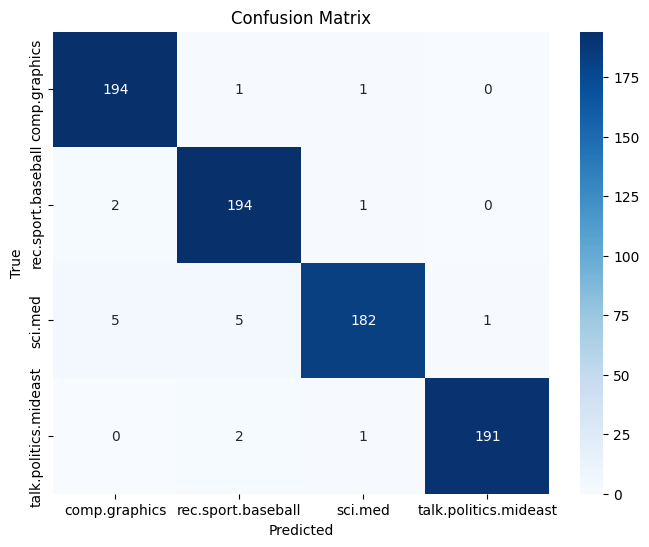

In [8]:
#visualizing confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # import the matplotlib library
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names) # use newsgroups instead of news_data
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Demo\#1: Classifying News Articles using Logistic Regression


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
# Load the dataset
categories = ['rec.sport.baseball', 'sci.med', 'talk.politics.mideast', 'comp.graphics']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# Convert text to TF-IDF representation
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=3000)
X = tfidf.fit_transform(newsgroups.data)
y = newsgroups.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)  # Increase iterations if needed

# Train the classifier on the training data
lr_classifier.fit(X_train, y_train)

# Predict the categories for the test set
y_pred_lr = lr_classifier.predict(X_test)

In [12]:
# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

# Print the classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=newsgroups.target_names))

Logistic Regression Accuracy: 97.56%
Logistic Regression Classification Report:
                       precision    recall  f1-score   support

        comp.graphics       0.95      0.97      0.96       196
   rec.sport.baseball       0.97      0.99      0.98       197
              sci.med       0.99      0.94      0.97       193
talk.politics.mideast       0.99      0.99      0.99       194

             accuracy                           0.98       780
            macro avg       0.98      0.98      0.98       780
         weighted avg       0.98      0.98      0.98       780



# In-Class Exercise [Demo \#2: Sentiment Analysis of IMDB Movie Reviews]

In [13]:
!pip install datasets

import pandas as pd
from datasets import load_dataset

In [14]:
# Load the IMDb dataset
dataset = load_dataset('imdb')

# Convert the dataset to a DataFrame
df = pd.DataFrame(dataset['train'])

# Preprocessing
X = df['text']
y = df['label']

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [15]:
print(X[0])

I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, eve

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Use CountVectorizer to convert text data to a matrix of token counts
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=3000)
X_train_transformed = tfidf.fit_transform(X_train)
X_test_transformed = tfidf.transform(X_test)

In [18]:
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

In [19]:
# Train the model
nb_classifier.fit(X_train_transformed, y_train)

MultinomialNB()

In [20]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_transformed)

In [21]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.848

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2515
           1       0.84      0.86      0.85      2485

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

